# 지리정보 분석 - 커피빈 매장 분석

## 주소데이터 분석 + 맵

### 데이터 수집 (데이터 파일 읽어오기)

In [5]:
import pandas as pd
CB = pd.read_csv('./9장_data/CoffeeBean.csv',encoding = 'CP949',index_col = 0, header = 0, engine = 'python')
CB.head()

,store,address,phone
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778
4,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320


### 데이터 준비 및 탐색


In [9]:
CB.address

0                              서울시 강남구 학동로 211 1층  
1                        서울시 강남구 광평로 280 수서동 724호  
2                         서울시 강남구 논현로 566 강남차병원1층  
3                             서울시 서초구 강남대로 369 1층  
4                        서울 강남구 삼성동 159 코엑스몰 지하2층  
                           ...                     
238    인천광역시 중구 운서동 2868 인천공항 제2터미널 1층 연번(23-124)  
239                         부산광역시 부산진구 서전로 12, 1층  
240                     경기도 성남시 분당구 야탑로64 DS타워 1층  
241                                서울시 용산구 한강대로95  
242                     서울특별시 강남구 선릉로 433 세방빌딩 1층  
Name: address, Length: 243, dtype: object

In [11]:
# 시/도 행정구역 이름 정규화

addr = []
for address in CB.address:
    addr.append(address.split())  # 공백으로 나누기
    
print('데이터 개수 : %d' % len(addr))

데이터 개수 : 243


In [16]:
test = addr[0][0]+" "+addr[0][1]+" "+addr[0][2]
print(test)

서울시 강남구 학동로


In [17]:
# 행정구역 표준 이름이 아닌 것 수정하기.

addr2 = []

for i in range(len(addr)):
    if addr[i][0] == "서울": addr[i][0]="서울특별시"
    elif addr[i][0] == "서울시": addr[i][0]="서울특별시"
    elif addr[i][0] == "부산시": addr[i][0]="부산광역시"
    elif addr[i][0] == "인천": addr[i][0]="인천광역시"
    elif addr[i][0] == "광주": addr[i][0]="광주광역시"
    elif addr[i][0] == "대전시": addr[i][0]="대전광역시"
    elif addr[i][0] == "울산시": addr[i][0]="울산광역시"    
    elif addr[i][0] == "세종시": addr[i][0]="세종특별자치시"
    elif addr[i][0] == "경기": addr[i][0]="경기도"
    elif addr[i][0] == "충북": addr[i][0]="충청북도"
    elif addr[i][0] == "충남": addr[i][0]="충청남도"
    elif addr[i][0] == "전북": addr[i][0]="전라북도"
    elif addr[i][0] == "전남": addr[i][0]="전라남도"
    elif addr[i][0] == "경북": addr[i][0]="경상북도"
    elif addr[i][0] == "경남": addr[i][0]="경상남도"
    elif addr[i][0] == "제주": addr[i][0]="제주특별자치도"
    elif addr[i][0] == "제주도": addr[i][0]="제주특별자치도"
    elif addr[i][0] == "제주시": addr[i][0]="제주특별자치도"     
        
    # 서울특별시 + 강남구 + 학동로를 addr[i] 배열 하나로합쳐주는 역할 .join
    addr2.append(' '.join(addr[i]))


['서울특별시 강남구 학동로 211 1층',
 '서울특별시 강남구 광평로 280 수서동 724호',
 '서울특별시 강남구 논현로 566 강남차병원1층',
 '서울특별시 서초구 강남대로 369 1층',
 '서울특별시 강남구 삼성동 159 코엑스몰 지하2층',
 '서울특별시 강남구 압구정로 46길 3',
 '서울특별시 서초구 서초 1306-3호',
 '서울특별시 강남구 압구정로 461 네이처포엠빌딩B108,109호',
 '서울특별시 강남구 도산대로 126',
 '서울특별시 강남구 논현로 842 압구정빌딩1층',
 '서울특별시 강남구 논현로 512 지상1,2층',
 '서울특별시 서초구 강남대로 213 24호 지하1층',
 '서울특별시 강남구 삼성로 716 LEE76빌딩2층',
 '서울특별시 서초구 반포동 736-17 P빌딩 2층',
 '서울특별시 강남구 언주로 30길 10,112 현대비젼21 112호',
 '서울특별시 강남구 선릉로 749 1,2층',
 '서울특별시 강남구 테헤란로 87길 17 1층',
 '서울특별시 서초구 서초중앙로 118 1층',
 '서울특별시 강남구 선릉로 64길 23 1층',
 '서울특별시 강남구 도산대로49길 13 1층 17,18호',
 '서울특별시 강남구 선릉로 157길 12 석전빌딩 1~4층',
 '서울특별시 서초구 강남대로 51길 1 511 TOWER 1층',
 '서울특별시 강남구 논현 231-13호 팍스타워지하1층',
 '서울특별시 강남구 영동대로 513 컨벤션별관A동 지하 2층',
 '서울특별시 강남구 영동대로 511 트레이드타워 지하1층',
 '서울특별시 강남구 영동대로 607 12번지 1,2층',
 '서울특별시 강남구 삼성로 85길 11 롯데캐슬아파트생활편익시설동',
 '서울특별시 서초구 신반포로 23 1141호 엘루체백화점내1층1013~1015호',
 '서울특별시 송파구 석촌호수로 118 1층',
 '서울특별시 서초구 서초동 1685-8호 101~2호,113~4호,121호',
 '서울특별시 강남구 논현로 717 1층',
 '서

In [18]:
addr2 = pd.DataFrame(addr2, columns = ['address2'])
addr2

,address2
0,서울특별시 강남구 학동로 211 1층
1,서울특별시 강남구 광평로 280 수서동 724호
2,서울특별시 강남구 논현로 566 강남차병원1층
3,서울특별시 서초구 강남대로 369 1층
4,서울특별시 강남구 삼성동 159 코엑스몰 지하2층
...,...
238,인천광역시 중구 운서동 2868 인천공항 제2터미널 1층 연번(23-124)
239,"부산광역시 부산진구 서전로 12, 1층"
240,경기도 성남시 분당구 야탑로64 DS타워 1층
241,서울특별시 용산구 한강대로95


In [19]:
CB2 = pd.concat([CB,addr2], axis = 1)
CB2.head()

,store,address,phone,address2
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973,서울특별시 강남구 학동로 211 1층
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326,서울특별시 강남구 광평로 280 수서동 724호
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615,서울특별시 강남구 논현로 566 강남차병원1층
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778,서울특별시 서초구 강남대로 369 1층
4,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320,서울특별시 강남구 삼성동 159 코엑스몰 지하2층


In [20]:
# 작업 내용을 csv 파일에 저장.
CB2.to_csv('./9장_data/CoffeeBean_2.csv', encoding = 'CP949', index = False)

### 데이터 모델링

In [24]:
# 지도 정보 시각화 라이브러리 임포트
import folium

In [26]:
# 숭례문 좌표를 사용해서 지도 객체 테스트하기.
map_osm = folium.Map(location = [37.560284,126.975334], zoom_start = 16)

In [27]:
map_osm

In [28]:
map_osm.save('./9장_data/map.html')  # 지도파일 html로 저장.

In [29]:
# 커피빈 데이터 로드
CB_file = pd.read_csv('./9장_data/CoffeeBean_2.csv', encoding = 'cp949',engine = 'python')
CB_file.head()

,store,address,phone,address2
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973,서울특별시 강남구 학동로 211 1층
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326,서울특별시 강남구 광평로 280 수서동 724호
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615,서울특별시 강남구 논현로 566 강남차병원1층
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778,서울특별시 서초구 강남대로 369 1층
4,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320,서울특별시 강남구 삼성동 159 코엑스몰 지하2층


In [30]:
# 오픈 소프트웨어 Geocoder-Xr을 사용하여 구한 GPS 좌표 파일 로드

CB_geoData = pd.read_csv('./9장_data/CB_geo.shp_2.csv',encoding = 'cp949',engine = 'python')
CB_geoData

,No,store,address,phone,address2,경도,위도,상태
0,1,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973,서울특별시 강남구 학동로 211 1층,127.032053,37.514678,정좌표
1,2,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326,서울특별시 강남구 광평로 280 수서동 724호,127.103108,37.487319,정좌표
2,3,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615,서울특별시 강남구 논현로 566 강남차병원1층,127.034824,37.506440,정좌표
3,4,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778,서울특별시 서초구 강남대로 369 1층,127.028217,37.495661,정좌표
4,5,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320,서울특별시 강남구 삼성동 159 코엑스몰 지하2층,127.058795,37.512512,정좌표
...,...,...,...,...,...,...,...,...
238,239,인천공항 제2여객터미널 입구점,인천광역시 중구 운서동 2868 인천공항 제2터미널 1층 연번(23-124),032-743-2894,인천광역시 중구 운서동 2868 인천공항 제2터미널 1층 연번(23-124),126.433631,37.468589,정좌표
239,240,부산서면서전로점,"부산광역시 부산진구 서전로 12, 1층",051-819-8708,"부산광역시 부산진구 서전로 12, 1층",129.060872,35.157524,정좌표
240,241,분당차병원본관앞점,경기도 성남시 분당구 야탑로64 DS타워 1층,031-8017-8243,경기도 성남시 분당구 야탑로64 DS타워 1층,127.125979,37.409503,정좌표
241,242,신용산역래미안점,서울시 용산구 한강대로95,02-2074-1049,서울특별시 용산구 한강대로95,126.967287,37.529452,정좌표


In [40]:
# 위에 커피빈 매장의 위치를 표시할 지도 객체를 먼저 생성함.

Map_CB = folium.Map(location = [37.670284, 126.975334], zoom_start = 12)


In [41]:
for i, store in CB_geoData.iterrows():
    print(i,store)
    folium.Marker(location = [store['위도'], store['경도']], popup = store['store'],icon = folium.Icon(color = 'red', icon = 'star')).add_to(Map_CB)
    

0 No                             1
store                    학동역 DT점
address     서울시 강남구 학동로 211 1층  
phone               02-3444-9973
address2    서울특별시 강남구 학동로 211 1층
경도                    127.032053
위도                     37.514678
상태                           정좌표
Name: 0, dtype: object
1 No                                   2
store                              수서점
address     서울시 강남구 광평로 280 수서동 724호  
phone                     02-3412-2326
address2    서울특별시 강남구 광평로 280 수서동 724호
경도                          127.103108
위도                           37.487319
상태                                 정좌표
Name: 1, dtype: object
2 No                                  3
store                            차병원점
address     서울시 강남구 논현로 566 강남차병원1층  
phone                     02-538-7615
address2    서울특별시 강남구 논현로 566 강남차병원1층
경도                         127.034824
위도                           37.50644
상태                                정좌표
Name: 2, dtype: object
3 No                              4
store    

In [39]:
Map_CB

In [47]:
Map_CB.save('./9장_data/map_CB.html')

In [48]:
import webbrowser

webbrowser.open('/view/0.Python_ehkoo/21일차/9장_data/map_CB.html')

True

# 행정구역 데이터 분석 + 블록맵

## 데이터 준비 및 탐색

In [51]:
import pandas as pd
pd.set_option('mode.chained_assignment', None) 
# warning 방지용
data = pd.read_csv('./9장_data/공공보건의료기관현황.csv', index_col = 0, encoding = 'CP949', engine = 'python')
data.head()


,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [52]:
data['주소'].tolist()

['강원도 춘천시 충열로 142번길 24-16',
 '강원도 삼척시 오십천로 418',
 '강원도 영월군 영월읍 중앙1로 59',
 '강원도 원주시 서원대로 387(개운동)',
 '강원도 강릉시 경강로 2007(남문동 164-1)',
 '강원도 속초시 영랑호반길 3',
 '강원도 춘천시 세실로 252',
 '강원도 강릉시 경강로 2007',
 '강원도 정선군 사북읍 지장천로 727',
 '경기도 수원시 장안구 수성로 245번길 69',
 '경기도 이천시 경충대로 2742',
 '경기도 안성시 고수2로 17번지(당왕동)',
 '경기도 의정부시 흥선로 142 (의정부동)',
 '경기도 포천시 포천로 1648(신읍동)',
 '경기도 파주시 중앙로 207(금촌동)',
 '경기도 용인시 기흥구 중부대로 940',
 '경기도 평택시 삼남로 312(도일동)',
 '경기도 시흥시 하중로 285',
 '경기도 여주시 북내면 도예로 361-14',
 '경기도 남양주시 수동면 외방로 172번길32',
 '경기도 동두천시 탑신로 536',
 '경기도 용인시 기흥구 중부대로 940',
 '경기 안산시 상록구 차돌배기로 24',
 '경기도 부천시 까치로 26',
 '경남 통영시 도산면 남해안대로1818',
 '경남 사천시 축동면 서삼로 1110-35',
 '경남 사천시 축동면 서삼로1110-35',
 '창원시 의창구 북면 단내로 499-32',
 '경남 김해시 김해대로 1814-39(삼계동)',
 '경상남도 양산시 상북면 양산대로 1870-64',
 '경상남도 거창군 거창읍 운정3길 180',
 '창원시 마산합포구3.15대로 231',
 '경상남도 남해군 남해읍 화전로173-1',
 '경상남도 창원시 마산합포구 현동로 15',
 '경상남도 의령군 부림면 대한로 1655',
 '경상북도 포항시 북구 용흥로 36',
 '경상북도 김천시 모암길 24(모암동)',
 '경상북도 안동시 태사2길 55',
 '경상북도 울진군 울진읍 현내항길 71',
 '경상북도 포항시 북구 용흥로 36',
 '경

## 시도 이름 확인하기

In [53]:
# 주소에서 시도, 군구 정보 분리
addr = pd.DataFrame(data['주소'].apply(lambda v: v.split()[:2]).tolist(), columns = ('시도','군구'))
addr.head() #작업내용 확인용 출력

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


In [ ]:
# 시도 이름 확인하기
addr['시도'].unique()  # 중복제거

In [57]:
# 잘못된 시도 이름 수정: 창원시, 경산시, 천안시

addr[addr['시도'] == '창원시']
addr.iloc[27] == ['경상남도','창원시']

시도    False
군구    False
Name: 27, dtype: bool

In [58]:
addr[addr['시도'] == '창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [60]:
addr.iloc[31] =['경상남도','창원시']

In [62]:
addr.iloc[31]

시도            창원시
군구    마산합포구3.15대로
Name: 31, dtype: object

In [63]:
addr[addr['시도'] == '천안시']


,시도,군구
209,천안시,동남구
210,천안시,동남구


In [64]:
addr.iloc[209] = ['충청남도','천안시']
addr.iloc[209]

시도    충청남도
군구     천안시
Name: 209, dtype: object

In [66]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '창원시', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [67]:
# 시도이름을 표준 이름으로 수정 -> 람다 사용하기!!
## 표준 행정구역 이름으로 수정 :  경기 -> 경기도, 경남 -> 경상남도, ...
addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도', '충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시', '대전시':'대전광역시', '충남':'충청남도', '전남':'전라남도', '전북':'전라북도'}

In [68]:
addr['시도'] = addr['시도'].apply(lambda v : addr_aliases.get(v,v))

In [69]:
addr['시도'].unique()

array(['강원도', '경기도', '경상남도', '창원시', '경상북도', '경산시', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도',
       '서울특별시', '충청남도', '울산광역시', '천안시'], dtype=object)

In [71]:
# 잘못된 군구 이름도 동일하게 수정하기
addr[addr['군구'] == '아란13길']


,시도,군구
75,제주특별자치도,아란13길


In [72]:
addr.iloc[75] = ['제주특별자치도','제주시']
addr.iloc[75]

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

In [73]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '마산합포구3.15대로', '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시',
       '구미시', '영주시', '상주시', '문경시', '경안로', '의성군', '청도군', '고령군', '칠곡군',
       '봉화군', '울릉군', '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시',
       '광산구', '남구', '중구', '제주시', '서구', '전주시', '진주시', '청주시', '종로구', '성남시',
       '동구', '화순군', '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시',
       '고양시', '홍천군', '양구군', '청원군', '계룡시', '논산시', '함평군', '경산시', '양평군',
       '수성구', '달성군', '연수구', '노원구', '기장군', '공주시', '강북구', '광진구', '나주시',
       '창녕군', '목포시', '고흥군', '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구',
       '동작구', '동대문구', '양천구', '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군',
       '광양시', '영광군', '무안군', '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군',
       '완주군', '부안군', '정읍시', '남원시', '군산시', '고창군', '진안군', '서귀포시', '천안시',
       '동남구

## 행정구역별 공공보건의료기관의 수 구하기

In [75]:
# 시도 군구 컬럼 결합하기

addr['시도군구'] = addr.apply(lambda r : r['시도']+ ' ' + r['군구'], axis = 1)
addr.head()

,시도,군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [77]:
# 의료기관 수를 저장할 컬럼 만들기
addr['count'] = 0
addr.head()

,시도,군구,시도군구,count
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0


In [82]:
addr.groupby(['시도','군구','시도군구'], as_index = False).count()
addr_group = pd.DataFrame(addr.groupby(['시도','군구','시도군구'], as_index = False).count())

In [83]:
addr_group.head()

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


In [84]:
# 인덱스 설정하기
addr_group = addr_group.set_index("시도군구")
addr_group.head()

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


In [85]:
# 행정구역 인구수 컬럼 추가하기
population = pd.read_excel('./9장_data/행정구역_시군구_별__성별_인구수_2.xlsx')

population.head()    #작업 확인용 출력

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684


In [86]:
population = population.rename(columns = {'행정구역(시군구)별(1)': '시도', '행정구역(시군구)별(2)': '군구'}) #컬럼이름 변경
#딕셔너리 형태로 써주기
population.head()  #작업 확인용 출력

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684


In [102]:
len(population['군구'][0])
len(population['군구'][0].strip())

3

In [103]:
# 병합에 사용할 '시도군구' 컬럼 추가하기

for element in range(0,len(population)):
    population['군구'][element] = population['군구'][element].strip()

In [104]:
population['시도군구'] = population.apply(lambda r : r['시도'] + ' '+r['군구'],axis = 1 )

In [105]:
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
시도군구,,,,,,
서울특별시 종로구,서울특별시,종로구,151215,73688,77527,서울특별시 종로구
서울특별시 중구,서울특별시,중구,126201,61946,64255,서울특별시 중구
서울특별시 용산구,서울특별시,용산구,229385,110701,118684,서울특별시 용산구
서울특별시 성동구,서울특별시,성동구,300410,147020,153390,서울특별시 성동구
서울특별시 광진구,서울특별시,광진구,351263,170164,181099,서울특별시 광진구


In [106]:
population = population[population.군구 != '소계']
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
시도군구,,,,,,
서울특별시 종로구,서울특별시,종로구,151215,73688,77527,서울특별시 종로구
서울특별시 중구,서울특별시,중구,126201,61946,64255,서울특별시 중구
서울특별시 용산구,서울특별시,용산구,229385,110701,118684,서울특별시 용산구
서울특별시 성동구,서울특별시,성동구,300410,147020,153390,서울특별시 성동구
서울특별시 광진구,서울특별시,광진구,351263,170164,181099,서울특별시 광진구


In [107]:
# 병합의 기준이 될 인덱스를 '시도군구'로 설정

population = population.set_index("시도군구")
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,151215,73688,77527
서울특별시 중구,서울특별시,중구,126201,61946,64255
서울특별시 용산구,서울특별시,용산구,229385,110701,118684
서울특별시 성동구,서울특별시,성동구,300410,147020,153390
서울특별시 광진구,서울특별시,광진구,351263,170164,181099


In [108]:
# 의료기관 데이터 프레임과 시도군구별 인구수 데이터 프레임 병합하기

In [109]:
addr_population_merge = pd.merge(addr_group,population, how = 'inner', left_index = True, right_index = True)

In [110]:
addr_population_merge.head()

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,213328,105775,107553
강원도 동해시,강원도,동해시,1,강원도,동해시,90417,45782,44635
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,66806,33811,32995
강원도 속초시,강원도,속초시,1,강원도,속초시,81840,40470,41370
강원도 양구군,강원도,양구군,1,강원도,양구군,22526,11937,10589


In [111]:
# 필요한 컬럼만 추출하기

local_MC_Population = addr_population_merge[['시도_x', '군구_x',  'count', '총인구수 (명)']]
local_MC_Population.head()   #작업 확인용 출력  

,시도_x,군구_x,count,총인구수 (명)
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,213328
강원도 동해시,강원도,동해시,1,90417
강원도 삼척시,강원도,삼척시,1,66806
강원도 속초시,강원도,속초시,1,81840
강원도 양구군,강원도,양구군,1,22526


In [121]:
local_MC_Population = local_MC_Population.rename(columns = {'시도_x' : '시도', '군구_x' : '군구','총인구수 (명)':'인구수'})
local_MC_Population.head()

,시도,군구,count,인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,213328
강원도 동해시,강원도,동해시,1,90417
강원도 삼척시,강원도,삼척시,1,66806
강원도 속초시,강원도,속초시,1,81840
강원도 양구군,강원도,양구군,1,22526


In [122]:
MC_count = local_MC_Population['count']
print(MC_count)


시도군구
강원도 강릉시     4
강원도 동해시     1
강원도 삼척시     1
강원도 속초시     1
강원도 양구군     1
           ..
충청북도 단양군    1
충청북도 영동군    1
충청북도 제천시    1
충청북도 청주시    4
충청북도 충주시    2
Name: count, Length: 138, dtype: int64


In [123]:
# 시도군구의 인구대비 의료기관 수 비율 구하기

# count / 인구수 * 십만.
local_MC_Population['MC_ratio'] = MC_count.div(local_MC_Population['인구수'], axis=0)*100000

local_MC_Population.head()   #작업 확인용 출력

,시도,군구,count,인구수,MC_ratio
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,213328,1.875047
강원도 동해시,강원도,동해시,1,90417,1.105987
강원도 삼척시,강원도,삼척시,1,66806,1.496872
강원도 속초시,강원도,속초시,1,81840,1.221896
강원도 양구군,강원도,양구군,1,22526,4.439315


## 분석 모델 구축 및 시각화


In [126]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf').get_name()
rc('font', family=font_name)

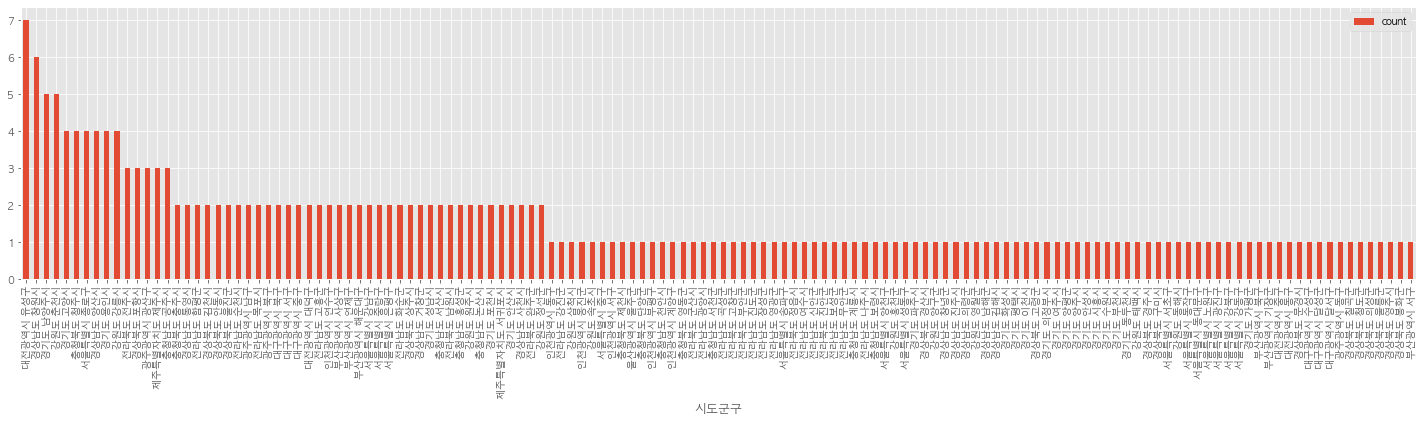

In [127]:
# 행정 구역별 공공보건의료기관수에 대한 바 차트

MC_ratio = local_MC_Population[['count']]
MC_ratio = MC_ratio.sort_values('count', ascending = False)
plt.rcParams["figure.figsize"] = (25,5)
MC_ratio.plot(kind='bar', rot=90) #글씨 회전
plt.show()

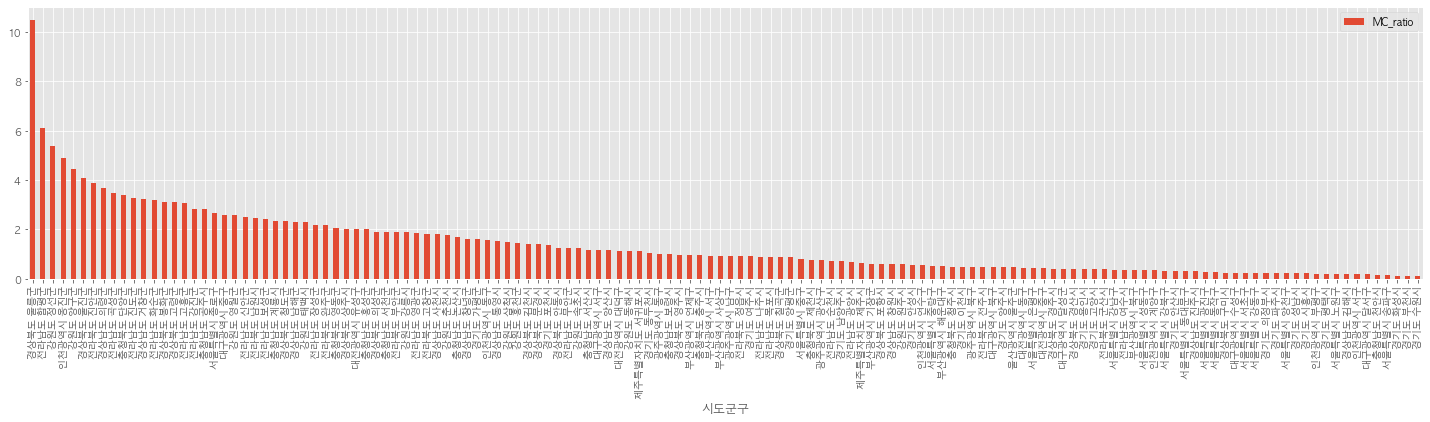

In [129]:
# 행정구역별 인구수 대비 공공보건의료기관 비율에 대한 바 차트
MC_ratio = local_MC_Population[['MC_ratio']]
MC_ratio = MC_ratio.sort_values('MC_ratio', ascending = False)
plt.rcParams["figure.figsize"] = (25,5)
MC_ratio.plot(kind='bar', rot=90)
plt.show()

In [130]:
# 블록맵 데이터 파일 열기
import os
path = os.getcwd()


In [132]:
data_draw_korea = pd.read_csv('./9장_data/data_draw_korea.csv', index_col=0, encoding='UTF-8', engine='python')

data_draw_korea.head()  

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [133]:
data_draw_korea['시도군구'] = data_draw_korea.apply(lambda r : r['광역시도'] + ' '+ r['행정구역'], axis = 1)
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역,시도군구
0,202520,강릉,11,4,1040.07,강원도,강릉시,강원도 강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군,강원도 고성군
2,86747,동해,11,5,180.01,강원도,동해시,강원도 동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시,강원도 삼척시
4,76733,속초,9,1,105.25,강원도,속초시,강원도 속초시


In [134]:
# 병합에 필요한 시도군구 컬럼을 인덱스로 설정
data_draw_korea = data_draw_korea.set_index("시도군구")
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시


In [135]:
data_draw_korea_MC_Population_all = pd.merge(data_draw_korea,local_MC_Population,  how='outer',  left_index=True, right_index=True)

data_draw_korea_MC_Population_all

,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,MC_ratio
시도군구,,,,,,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시,강원도,강릉시,4.0,213328.0,1.875047
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군,NaN,NaN,NaN,NaN,NaN
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시,강원도,동해시,1.0,90417.0,1.105987
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시,강원도,삼척시,1.0,66806.0,1.496872
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시,강원도,속초시,1.0,81840.0,1.221896
...,...,...,...,...,...,...,...,...,...,...,...,...
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시,충청북도,제천시,1.0,134359.0,0.744275
충청북도 증평군,34480,증평,6,11,81.84,충청북도,증평군,NaN,NaN,NaN,NaN,NaN
충청북도 진천군,62809,진천,5,11,406.08,충청북도,진천군,NaN,NaN,NaN,NaN,NaN


In [136]:
# 한국 지도의 블록맵 경계선 좌표를 리스트로 생성.
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [139]:
# 블록맵에서 블록에 해당 데이터를 매핑하여 색을 표시하는 함수
import numpy as np
def draw_blockMap(blockedMap, targetData, title, color ):
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
    
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
            dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
            if len(row['행정구역']) <= 2:
                dispname += row['행정구역'][-1]
        else:
            dispname = row['행정구역'][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)
    plt.axis('off')
    
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    
    plt.savefig('.\\9장_data\\' + 'blockMap_' + targetData + '.png')
                      
    
    plt.show()      

/Users/gueunhye/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  app.launch_new_instance()
/Users/gueunhye/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


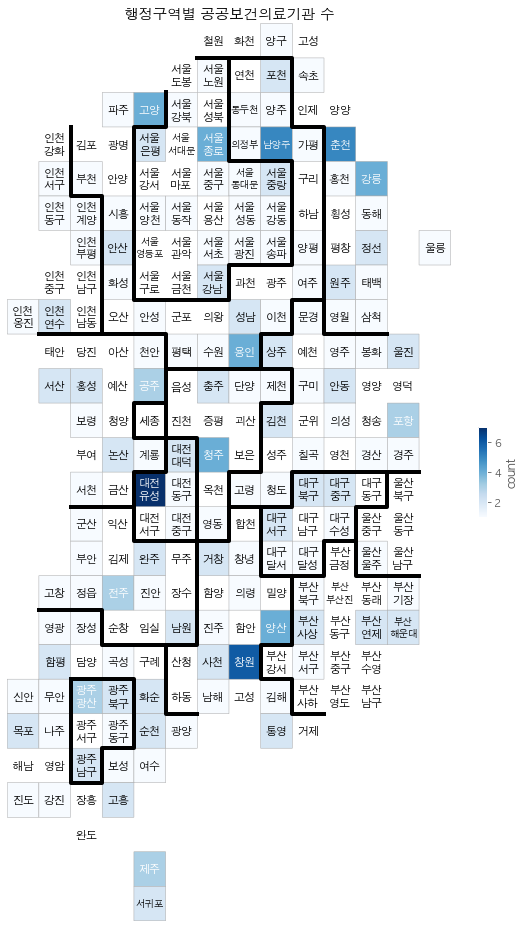

In [141]:
# 행정구역별 인구에 대한 의료기관 수에 대한 블록맵

draw_blockMap(data_draw_korea_MC_Population_all, 'count', '행정구역별 공공보건의료기관 수', 'Blues')

In [ ]:
# 행정구역별 인구에 대한 의료기관 비율에 대한 블록맵
draw_blockMap(data_draw_korea_MC_Population_all, 'MC_ratio', '행정구역별 인구수 대비 공공보건의료기관 비율', 'Reds' )

/Users/gueunhye/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  app.launch_new_instance()
/Users/gueunhye/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
